In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import os

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc, accuracy_score

In [2]:
df_games=pd.read_csv('games.csv')
df_details=pd.read_csv('games_details.csv')
df_players=pd.read_csv('players.csv')
df_rank=pd.read_csv('ranking.csv')
df_teams=pd.read_csv('teams.csv')

C:\Users\akoft\AppData\Local\Temp\ipykernel_24476\4226395769.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_details=pd.read_csv('games_details.csv')


In [3]:
df_games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

In [6]:
df_teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [7]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


In [8]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


In [9]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

In [10]:
df_games.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [11]:
df_games['GAME_ID'].value_counts()

22000070    2
22000049    2
22000053    2
22000055    2
22000042    2
           ..
40900144    1
40900123    1
40900164    1
40900113    1
11400001    1
Name: GAME_ID, Length: 25767, dtype: int64

In [12]:
df_games.drop_duplicates(subset=['GAME_ID'],inplace=True)

In [13]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25767 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25767 non-null  object 
 1   GAME_ID           25767 non-null  int64  
 2   GAME_STATUS_TEXT  25767 non-null  object 
 3   HOME_TEAM_ID      25767 non-null  int64  
 4   VISITOR_TEAM_ID   25767 non-null  int64  
 5   SEASON            25767 non-null  int64  
 6   TEAM_ID_home      25767 non-null  int64  
 7   PTS_home          25668 non-null  float64
 8   FG_PCT_home       25668 non-null  float64
 9   FT_PCT_home       25668 non-null  float64
 10  FG3_PCT_home      25668 non-null  float64
 11  AST_home          25668 non-null  float64
 12  REB_home          25668 non-null  float64
 13  TEAM_ID_away      25767 non-null  int64  
 14  PTS_away          25668 non-null  float64
 15  FG_PCT_away       25668 non-null  float64
 16  FT_PCT_away       25668 non-null  float6

In [14]:
df_names = df_teams[['TEAM_ID', 'NICKNAME']]


home_names = df_names.copy()
home_names.columns = ['HOME_TEAM_ID', 'NICKNAME']
merge_1 = pd.merge(df_games['HOME_TEAM_ID'], home_names, how ="left", on="HOME_TEAM_ID")  
df_games['HOME_TEAM_ID'] = merge_1['NICKNAME']


visitor_names = df_names.copy()
visitor_names.columns = ['VISITOR_TEAM_ID', 'NICKNAME']
merge_2 = pd.merge(df_games['VISITOR_TEAM_ID'], visitor_names, how = "left", on="VISITOR_TEAM_ID")
df_games['VISITOR_TEAM_ID'] = merge_2['NICKNAME']


<AxesSubplot:title={'center':'Correlation Matrix'}>

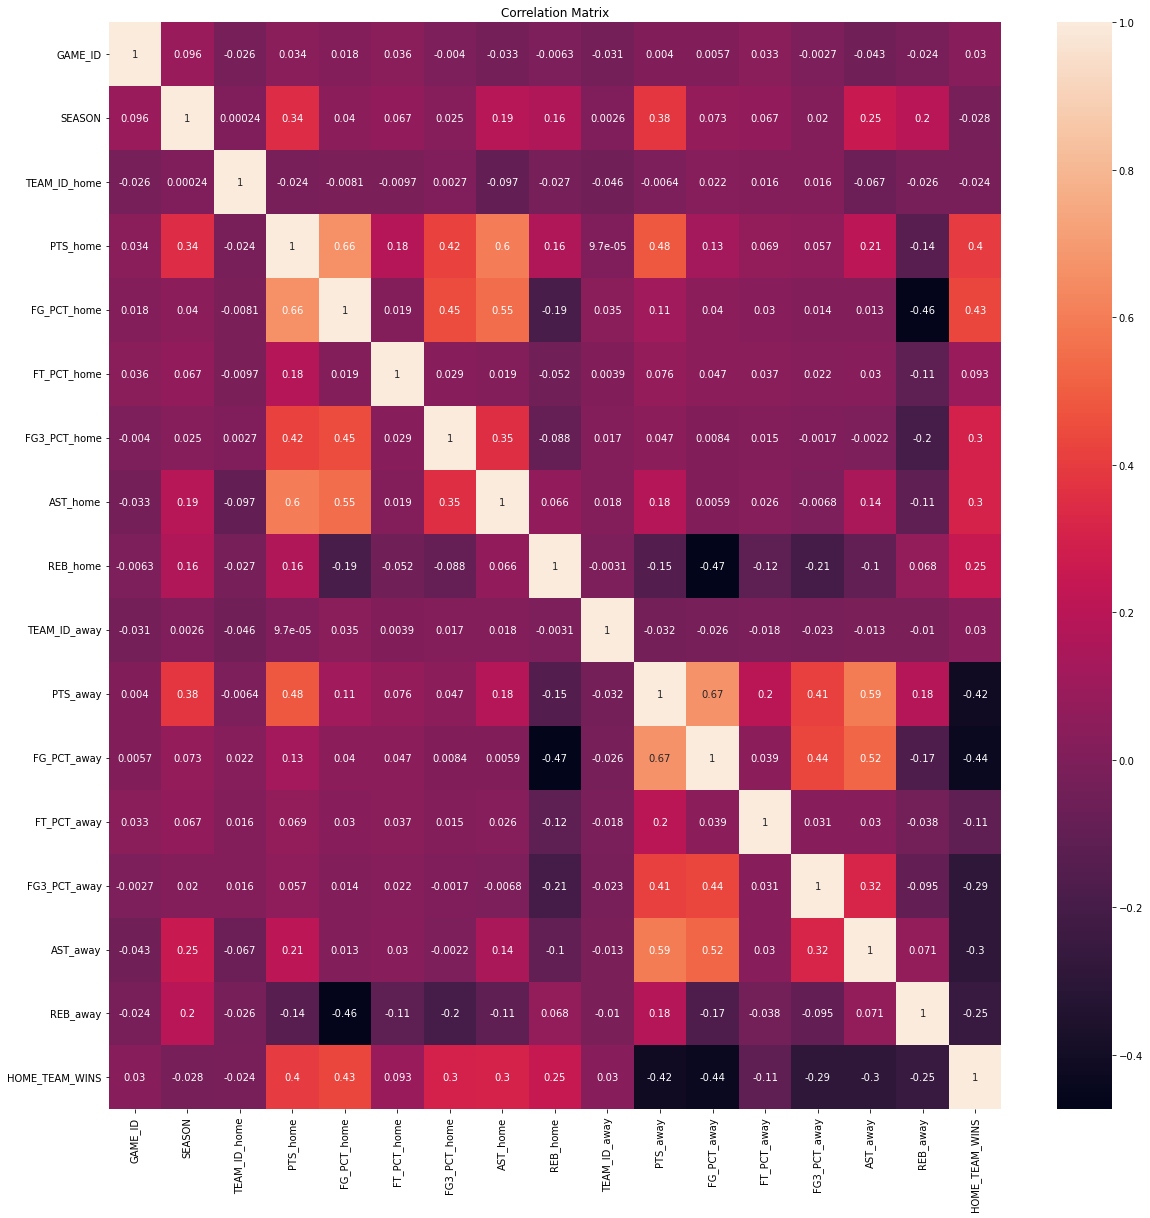

In [15]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
sns.heatmap(df_games.corr(),annot=True,cmap='rocket')

In [16]:
df_games = df_games.drop(['GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away'], axis=1)

In [17]:
df_games.dropna(inplace=True)

In [18]:
df_games

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Heat,Timberwolves,2021,104.0,0.398,0.760,0.333,23.0,53.0,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Bulls,Cavaliers,2021,101.0,0.443,0.933,0.429,20.0,46.0,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Spurs,Pacers,2021,108.0,0.412,0.813,0.324,28.0,52.0,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Warriors,Bucks,2021,122.0,0.484,0.933,0.400,33.0,55.0,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Nuggets,Raptors,2021,115.0,0.551,0.750,0.407,32.0,39.0,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25762,2014-10-12,11400040,Hawks,Pelicans,2014,119.0,0.539,0.870,0.680,28.0,49.0,114.0,0.436,0.591,0.487,23.0,35.0,1
25763,2014-10-12,11400042,Bulls,Wizards,2014,75.0,0.366,0.882,0.000,17.0,37.0,116.0,0.562,0.677,0.394,33.0,44.0,0
25764,2014-10-11,11400033,Lakers,Nuggets,2014,119.0,0.465,0.737,0.355,25.0,40.0,122.0,0.506,0.680,0.429,23.0,44.0,0
25765,2014-10-11,11400036,Raptors,Kings,2014,80.0,0.375,0.714,0.292,12.0,30.0,96.0,0.526,0.600,0.381,17.0,38.0,0


In [19]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25639 entries, 0 to 25766
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAME_DATE_EST    25639 non-null  object 
 1   GAME_ID          25639 non-null  int64  
 2   HOME_TEAM_ID     25639 non-null  object 
 3   VISITOR_TEAM_ID  25639 non-null  object 
 4   SEASON           25639 non-null  int64  
 5   PTS_home         25639 non-null  float64
 6   FG_PCT_home      25639 non-null  float64
 7   FT_PCT_home      25639 non-null  float64
 8   FG3_PCT_home     25639 non-null  float64
 9   AST_home         25639 non-null  float64
 10  REB_home         25639 non-null  float64
 11  PTS_away         25639 non-null  float64
 12  FG_PCT_away      25639 non-null  float64
 13  FT_PCT_away      25639 non-null  float64
 14  FG3_PCT_away     25639 non-null  float64
 15  AST_away         25639 non-null  float64
 16  REB_away         25639 non-null  float64
 17  HOME_TEAM_WI

In [20]:
df_games=df_games.sort_values('GAME_DATE_EST')

In [21]:
df_games=df_games.reset_index(drop=True)

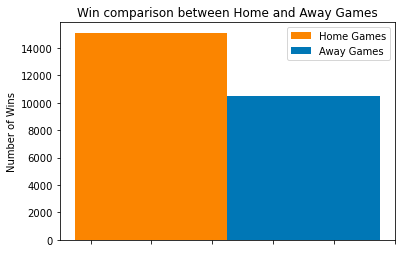

In [22]:
wl_group = df_games.groupby(['HOME_TEAM_WINS'])

win_filt = wl_group.get_group(1)
lose_filt = wl_group.get_group(0)

x = win_filt['HOME_TEAM_WINS'].value_counts()
y = lose_filt['HOME_TEAM_WINS'].value_counts()

ti = [0.5]
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#fb8500',label = 'Home Games')
plt.bar(hor + 0.75,y,width = 0.25,color = '#0077b6',label = 'Away Games')

plt.ylabel('Number of Wins')
plt.xticks(color = 'w')
plt.title('Win comparison between Home and Away Games')
plt.legend()

In [ ]:
sns.pairplot(df_games, hue='HOME_TEAM_WINS');

In [ ]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
sns.heatmap(df_games.corr(),annot=True,cmap='rocket')

##It is observed that the variables that have the most correlation between them are:

PTS_home, FG_PCT_home, FG3_PCT_home, and AST_home.

PTS_away, FG_PCT_away, FG3_PCT_away, and AST_away.


It is normal for these variables to be correlated with each other since the more assists and percentage of three-pointers and field goals are made, the more points can be scored. The variables FT_PCT_home and FT_PCT_away (free throws) are not related to the points scored since they are not the most prevalent shots in a game, and with the fewest points scored in proportion to triples and field goals, since they these types of shots are only made with fouls.

Therefore, the variables 'PTS_home' and 'PTS_away' will be removed for the prediction models, since if we had these values, we would not need to predict if the team wins or not. At the moment they are kept to calculate other data of interest.

In [ ]:
top_win = np.where(df_games['HOME_TEAM_WINS'] == 1, df_games['HOME_TEAM_ID'], df_games['VISITOR_TEAM_ID'])
top_win = pd.DataFrame(top_win, columns=['TEAM_ID'])
top_win = top_win.value_counts().to_frame().reset_index()
top_win.columns=['TEAM','WINS']
plt.figure(figsize=(20,12))
sns.barplot(data=top_win, x='WINS', y='TEAM', palette = 'flare').set(title='Teams Win Counts' )

In [ ]:
top_win

In [ ]:
teamhome_pts=df_games.groupby(['HOME_TEAM_ID']).agg({'PTS_home':sum}).sort_values(['PTS_home'],ascending=False).reset_index()
teamhome_pts.columns=['TEAM','PTS']
teamaway_pts=df_games.groupby(['VISITOR_TEAM_ID']).agg({'PTS_away':sum}).sort_values(['PTS_away'],ascending=False).reset_index()
teamaway_pts.columns=['TEAM','PTS']


In [ ]:
team_pts = teamhome_pts.merge(teamaway_pts[['TEAM','PTS']], on='TEAM')
team_pts['TOTAL PTS'] = team_pts.sum(axis=1)
team_pts.columns = ['TEAM', 'PTS HOME', 'PTS AWAY', 'TOTAL POINTS']
team_pts = team_pts.sort_values(['TOTAL POINTS'],ascending=False)
team_pts

In [ ]:
sns.factorplot(data=team_pts[0:5],col='TEAM',kind='bar',palette='rocket')

In [ ]:
teamhome_ast = df_games.groupby(['HOME_TEAM_ID']).agg({'AST_home':sum}).sort_values(['AST_home'],ascending=False).reset_index()
teamhome_ast.columns = ['TEAM', 'ASSIST']

teamvisitor_ast = df_games.groupby(['VISITOR_TEAM_ID']).agg({'AST_away':sum}).sort_values(['AST_away'],ascending=False).reset_index()
teamvisitor_ast.columns = ['TEAM', 'ASSIST']

team_ast = teamhome_ast.merge(teamvisitor_ast[['TEAM','ASSIST']], on='TEAM')
team_ast['TOTAL ASSIST'] = team_ast.sum(axis=1)
team_ast.columns = ['TEAM', 'ASSIST HOME', 'ASSIST AWAY', 'TOTAL ASSIST']
team_ast = team_ast.sort_values(['TOTAL ASSIST'],ascending=False)
team_ast.head()

In [ ]:
sns.factorplot(data=team_ast[0:5],col='TEAM',kind='bar',palette='rocket')

In [ ]:
teamhome_reb = df_games.groupby(['HOME_TEAM_ID']).agg({'REB_home':sum}).sort_values(['REB_home'],ascending=False).reset_index()
teamhome_reb.columns = ['TEAM', 'REBOUNDS']

teamvisitor_reb = df_games.groupby(['VISITOR_TEAM_ID']).agg({'REB_away':sum}).sort_values(['REB_away'],ascending=False).reset_index()
teamvisitor_reb.columns = ['TEAM', 'REBOUNDS']

team_reb = teamhome_reb.merge(teamvisitor_reb[['TEAM', 'REBOUNDS']], on='TEAM')
team_reb['TOTAL REBOUNDS'] = team_reb.sum(axis=1)
team_reb.columns = ['TEAM', 'REBOUNDS HOME', 'REBOUNDS AWAY', 'TOTAL REBOUNDS']
team_reb = team_reb.sort_values(['TOTAL REBOUNDS'],ascending=False)
team_reb.head()

In [ ]:
sns.factorplot(data=team_reb[0:5], col="TEAM", kind="bar", palette = 'rocket')


In [ ]:
df_games_played_home = pd.DataFrame(df_games['HOME_TEAM_ID'].value_counts()).reset_index()
df_games_played_home.columns = ['TEAM','GAMES_PLAYED']


In [ ]:
df_games_played_away = pd.DataFrame(df_games['VISITOR_TEAM_ID'].value_counts()).reset_index()
df_games_played_away.columns = ['TEAM','GAMES_PLAYED']

In [ ]:
df_games_played = df_games_played_home.merge(df_games_played_away[['TEAM','GAMES_PLAYED']],on ='TEAM')
df_games_played['TOTAL GAMES'] = df_games_played.sum(axis=1)

df_games_played.columns = ['TEAM','HOME GAMES','AWAY GAMES','TOTAL GAMES']

In [ ]:
df_teamdata = df_games_played.merge(team_reb[['TEAM', 'REBOUNDS HOME', 'REBOUNDS AWAY', 'TOTAL REBOUNDS']], on='TEAM')

In [ ]:
df_teamdata = df_teamdata.merge(team_pts[['TEAM', 'PTS HOME', 'PTS AWAY', 'TOTAL POINTS']],on='TEAM')

In [ ]:
df_teamdata= df_teamdata.merge(team_ast[['TEAM', 'ASSIST HOME', 'ASSIST AWAY', 'TOTAL ASSIST']], on ='TEAM')

In [ ]:
df_teamdata

In [ ]:
df_teamdata['PPG'] = df_teamdata['TOTAL POINTS']/df_teamdata['TOTAL GAMES']

df_teamdata['APG'] = df_teamdata['TOTAL ASSIST']/df_teamdata['TOTAL GAMES']

df_teamdata['RPG'] = df_teamdata['TOTAL REBOUNDS']/df_teamdata['TOTAL GAMES']



In [ ]:
df_teamdata1 = df_teamdata.merge(top_win[['TEAM','WINS']], on ='TEAM')

df_teamdata1

In [ ]:
sns.factorplot(data=df_teamdata1[0:1],col='TEAM',kind='bar',palette='rocket')

In [ ]:
df_teamdataFinal = df_teamdata1.drop(columns=['HOME GAMES','AWAY GAMES','REBOUNDS HOME','REBOUNDS AWAY','TOTAL REBOUNDS','PTS HOME','PTS AWAY','TOTAL POINTS','ASSIST HOME','ASSIST AWAY','TOTAL ASSIST'])

In [ ]:
df_teamdataFinal['WINPG'] = df_teamdataFinal['WINS']/df_teamdataFinal['TOTAL GAMES']

In [ ]:
df_teamdataFinal= df_teamdataFinal.sort_values(['WINPG'], ascending=False)

In [ ]:
df_teamdataFinal['POWERCO']=round(df_teamdataFinal['PPG']*df_teamdataFinal['WINPG']*1000,0)


In [ ]:
df_teamdataFinal.to_csv('teamdataFinal.csv')

In [ ]:
df_games.drop(columns=['GAME_ID', 'PTS_home','PTS_away','FT_PCT_home','FT_PCT_away','GAME_DATE_EST'], inplace=True)


In [ ]:
df_games.to_csv('edited_games.csv')

In [ ]:
sns.pairplot(df_games, hue='HOME_TEAM_WINS');

In [ ]:
df_games

In [ ]:
df_games['HOME_TEAM_ID'].replace({'Spurs':51551},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Clippers':53287.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Heat':52864.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Suns':53200.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Cavaliers':52517.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'76ers':52737.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Raptors':52423.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Lakers':51916.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Mavericks':51737.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Jazz':51948.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Hornets':51868.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Warriors':51556.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Hawks':51407.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Knicks':51112.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Celtics':51077.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Grizzlies':51106.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Nets':51199.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Bulls':50997.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Trail Blazers':50587.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Timberwolves':50356.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Nuggets':50145.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Wizards':50139.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Magic':49058.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Pelicans':49056.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Pacers':48888.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Thunder':48725.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Pistons':47980.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Kings':48016.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Rockets':47597.0},inplace=True)
df_games['HOME_TEAM_ID'].replace({'Bucks':50155.0},inplace=True)


In [ ]:
df_games['VISITOR_TEAM_ID'].replace({'Spurs':51551},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Clippers':53287.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Heat':52864.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Suns':53200.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Cavaliers':52517.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'76ers':52737.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Raptors':52423.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Lakers':51916.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Mavericks':51737.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Jazz':51948.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Hornets':51868.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Warriors':51556.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Hawks':51407.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Knicks':51112.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Celtics':51077.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Grizzlies':51106.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Nets':51199.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Bulls':50997.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Trail Blazers':50587.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Timberwolves':50356.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Nuggets':50145.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Wizards':50139.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Magic':49058.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Pelicans':49056.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Pacers':48888.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Thunder':48725.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Pistons':47980.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Kings':48016.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Rockets':47597.0},inplace=True)
df_games['VISITOR_TEAM_ID'].replace({'Bucks':50155.0},inplace=True)


In [ ]:
powerco_dict={'Spurs':51551,'Clippers':53287,'Heat':52864,'Suns':53200,'Cavaliers':52517,'76ers':52737,'Raptors':52423,'Lakers':51916,
             'Mavericks':51737,'Jazz':51948,'Hornets':51868,'Warriors':51556,'Hawks':51407,'Knicks':51112,'Celtics':51077,'Grizzlies':51106,
             'Nets':51199.0,'Bulls':50997,'Trail Blazers','Timberwolves':50356,'Nuggets':50145,'Wizards':50139,'Magic':49058,'Pelicans':49056,'Pacers':48888,'Thunder':48725,'Pistons':47980,'Kings':48016,'Rockets':47597,'Bucks':50155}

In [ ]:
df_games

## Model Oluşturma

In [ ]:
a = df_games.drop(['HOME_TEAM_WINS'],axis=1)
b = df_games['HOME_TEAM_WINS']

X_train,x_test,Y_train,y_test = train_test_split(a,b, test_size = 0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=42)


In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_val)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest_val = round(random_forest.score(x_val, y_val) * 100, 2)
print(acc_random_forest_train,acc_random_forest_val)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
x_train_scaled = std_scale.fit_transform(x_train)
x_val_scaled = std_scale.transform(x_val)
x_test_scaled = std_scale.transform(x_test)

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train_scaled, y_train)

Y_pred = logreg.predict(x_val_scaled)

acc_log_train = round(logreg.score(x_train_scaled, y_train) * 100, 2)
acc_log_val = round(logreg.score(x_val_scaled, y_val) * 100, 2)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

Y_pred = knn.predict(x_val_scaled) 

acc_knn_train = round(knn.score(x_train_scaled, y_train) * 100, 2)
acc_knn_val = round(knn.score(x_val_scaled, y_val) * 100, 2)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)  

Y_pred = gaussian.predict(x_val)  

acc_gaussian_train = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian_val = round(gaussian.score(x_val, y_val) * 100, 2)

In [ ]:
perceptron = Perceptron()
perceptron.fit(x_train_scaled, y_train)

Y_pred = perceptron.predict(x_val_scaled)

acc_perceptron_train = round(perceptron.score(x_train_scaled, y_train) * 100, 2)
acc_perceptron_val = round(perceptron.score(x_val_scaled, y_val) * 100, 2)

In [ ]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(x_train_scaled, y_train)

Y_pred = linear_svc.predict(x_val_scaled)

acc_linear_svc_train = round(linear_svc.score(x_train_scaled, y_train) * 100, 2)
acc_linear_svc_val = round(linear_svc.score(x_val_scaled, y_val) * 100, 2)

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train) 

Y_pred = decision_tree.predict(x_val) 

acc_decision_tree_train = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree_val = round(decision_tree.score(x_val, y_val) * 100, 2)

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree'],
    'Train Score': [acc_linear_svc_train, acc_knn_train, acc_log_train, acc_random_forest_train,
                    acc_gaussian_train, acc_perceptron_train, acc_decision_tree_train],
    'Validation Score': [acc_linear_svc_val, acc_knn_val, acc_log_val, acc_random_forest_val,
                         acc_gaussian_val, acc_perceptron_val, acc_decision_tree_val]})

result_df = results.sort_values(by='Validation Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

In [ ]:
##Predict Proba yı görüntülyebilmek için Logistic Regression
##Cross val

In [ ]:
from sklearn.model_selection import cross_val_score
#Kazanmanın Tahmini
scores_accuracy = cross_val_score(logreg, X_train_scaled, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores_accuracy)
print("Mean:", scores_accuracy.mean())
print("Standard Deviation:", scores_accuracy.std())

In [ ]:
df_scores_acc =pd.DataFrame(scores_accuracy)
df_scores_acc

In [ ]:
##Kaybetmenin Tahmini
scores_recall = cross_val_score(logreg, X_train_scaled, Y_train, cv=10, scoring = "recall")

print("Scores:", scores_recall)
print("Mean:", scores_recall.mean())
print("Standard Deviation:", scores_recall.std())

In [ ]:
scores_f1 = cross_val_score(logreg, X_train_scaled, Y_train, cv=10, scoring = "f1")

print("Scores:", scores_f1)
print("Mean:", scores_f1.mean())
print("Standard Deviation:", scores_f1.std())

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def make_confusion_matrix(model, threshold=0.5): # Ön tanımlı threshold değeri
    y_predict = (model.predict_proba(x_test_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['HomeLost', 'HomeWin'],
           yticklabels=['HomeLost', 'HomeWin']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    
make_confusion_matrix(logreg) # En başarılı olan modelimiz

In [ ]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(logreg, threshold), threshold=(0.0,1.0,0.05))

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = logreg.predict_proba(X_train_scaled)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

In [ ]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=[14, 7])
plot_roc_curve(false_positive_rate, true_positive_rate)

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC Score:", r_a_score)

In [ ]:
new_pred = logreg.predict(x_test.values)

In [ ]:
new_pred = knn.predict(x_test.values)

In [ ]:
knew_pred = knn.predict(x_test.values)

In [ ]:
from joblib import dump, load
dump(logreg,'logreg1.pkl')
dump(knn,'knn_model.pkl')

In [ ]:
new_pred = logreg.predict(x_test.values)

In [ ]:
new_pred

In [ ]:
x_test["Prediction"] = knew_pred # Yaptığımız tahminleri DataFrame'e ekleme


In [ ]:
x_test=x_test.drop(columns=['Prediction'])

In [ ]:
x_test.head(20)

In [ ]:
x_test['Actual']=y_test

In [ ]:
powerco_dict={'Spurs':51551,'Clippers':53287,'Heat':52864,'Suns':53200,'Cavaliers':52517,'76ers':52737,'Raptors':52423,'Lakers':51916,
            'Mavericks': 51737,'Jazz':51948,'Hornets':51868,'Warriors':51556,'Hawks':51407,'Knicks':51112,'Celtics':51077,'Grizzlies':51106,
             'Nets':51199.0,'Bulls':50997,'Trail Blazers':50356,'Timberwolves':50356,'Nuggets':50145,'Wizards':50139,'Magic':49058,'Pelicans':49056,'Pacers':48888,'Thunder': 48725,'Pistons': 47980,'Kings':48016,'Rockets':47597,'Bucks':50155}

In [ ]:
powerco=powerco_dict.get('Clippers')
print((powerco))

In [ ]:
powercop_dict={51551:'Spurs',53287:'Clippers',52864:'Heat',53200:'Suns',52517:'Cavaliers',52737:'76ers',52423:'Raptors',51916:'Lakers',
             51737:'Mavericks',51948:'Jazz',51868:'Hornets',51556:'Warriors',51407:'Hawks',51112:'Knicks',51077:'Celtics',51106:'Grizzlies',
             51199:'Nets',50997:'Bulls',50587:'Trail Blazers',50356:'Timberwolves',50145:'Nuggets',50139:'Wizards',49058:'Magic',49056:'Pelicans',48888:'Pacers',48725:'Thunder',47980:'Piston',48016:'Kings',47597:'Rockets',50155:'Bucks'}

In [ ]:
print(powercop_dict.get(51551))